<a href="https://colab.research.google.com/github/kumaran123-suresh/Forecasting-house-peices-accurately-using-smart-suggestion-techniques-in-data-science-/blob/main/sourcecode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data:
   House_ID  Location  Size_sqft  Bedrooms  Bathrooms  Year_Built Garage  \
0         1     Urban        NaN       2.0          1      2015.0     No   
1         2     Rural     2000.0       NaN          1      2000.0    NaN   
2         3     Rural        NaN       2.0          2      2020.0    Yes   
3         4  Suburban     1500.0       3.0          3      2005.0     No   
4         5  Suburban     1800.0       1.0          1      2005.0    Yes   

      Price  
0  400000.0  
1  250000.0  
2  100000.0  
3       NaN  
4  300000.0  
Root Mean Squared Error: 105028.04

Feature Importance:
Year_Built           0.245902
Size_sqft            0.243393
Bedrooms             0.183612
Bathrooms            0.128606
Garage               0.081404
Location_Suburban    0.059130
Location_Urban       0.057953
dtype: float64


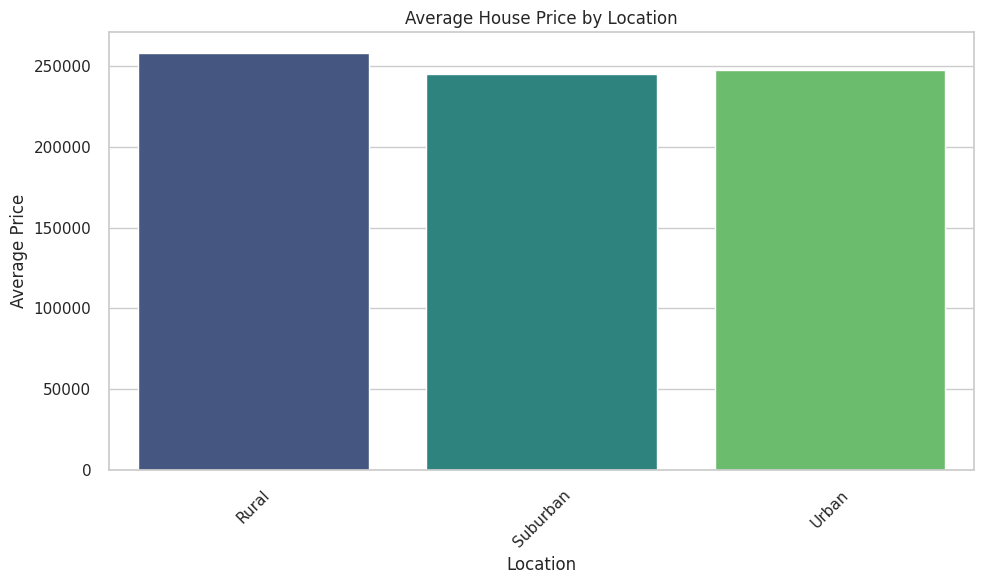

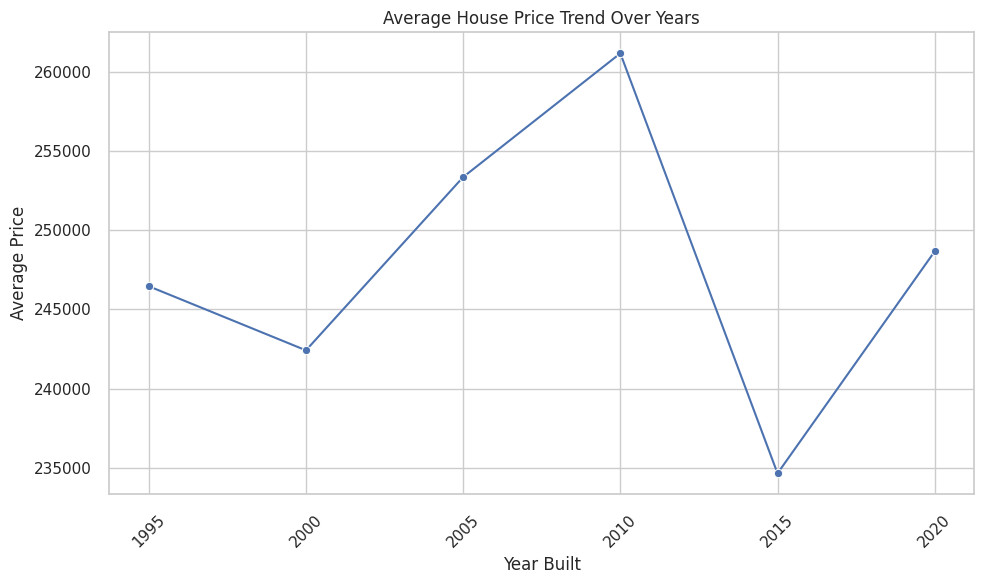

In [11]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'large_house_price_forecasting_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Initial Data:")
print(data.head())

# Data Cleaning
# Fill missing values
data['Size_sqft'] = data['Size_sqft'].fillna(data['Size_sqft'].mean())
data['Bedrooms'] = data['Bedrooms'].fillna(data['Bedrooms'].mode()[0])
data['Bathrooms'] = data['Bathrooms'].fillna(data['Bathrooms'].mode()[0])
data['Garage'] = data['Garage'].fillna('No')  # Assuming 'No' if missing
data['Price'] = data['Price'].fillna(data['Price'].mean())

# Convert categorical variables to numerical
data['Garage'] = data['Garage'].map({'Yes': 1, 'No': 0})

# Feature Selection
features = ['Location', 'Size_sqft', 'Bedrooms', 'Bathrooms', 'Garage', 'Year_Built']
X = pd.get_dummies(data[features], drop_first=True)  # One-hot encoding for categorical variables
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# Feature Importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Save the model (optional)
joblib.dump(model, 'house_price_model.pkl')

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Bar Graph: Average Price by Location
plt.figure(figsize=(10, 6))
avg_price_by_location = data.groupby('Location')['Price'].mean().reset_index()
sns.barplot(x='Location', y='Price', data=avg_price_by_location, palette='viridis')
plt.title('Average House Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Graph: Price Trend Over Years
plt.figure(figsize=(10, 6))
price_trend = data.groupby('Year_Built')['Price'].mean().reset_index()
sns.lineplot(x='Year_Built', y='Price', data=price_trend, marker='o')
plt.title('Average House Price Trend Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()